In [1]:
#Libraries for classifiers
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, recall_score
from sklearn import metrics

In [2]:
#importing necessary libraries into our code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff



# Data processing, metrics and modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score

from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict


# Stats
import scipy.stats as ss
from scipy import interp
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform


#ignore warning messages 
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



In [4]:

import pandas as pd
DataPath = ('statlog (1).csv')
data = pd.read_csv(DataPath)
print(data.head())
data.shape

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  70.0  1.0  4.0     130.0  322.0  0.0      2.0    109.0    0.0      2.4   
1  67.0  0.0  3.0     115.0  564.0  0.0      2.0    160.0    0.0      1.6   
2  57.0  1.0  2.0     124.0  261.0  0.0      0.0    141.0    0.0      0.3   
3  64.0  1.0  4.0     128.0  263.0  0.0      0.0    105.0    1.0      0.2   
4  74.0  0.0  2.0     120.0  269.0  0.0      2.0    121.0    1.0      0.2   

   slope   ca  thal  presence  
0    2.0  3.0   3.0         2  
1    2.0  0.0   7.0         1  
2    1.0  0.0   7.0         2  
3    2.0  1.0   7.0         1  
4    1.0  1.0   3.0         1  


(270, 14)

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Loading our dataset
DataPath = 'statlog (1).csv'
data = pd.read_csv(DataPath)

# Displaying the first few rows of the dataset
print(data.head())

# Displaying the shape of the dataset
print(data.shape)

# Defining target and categorical columns
target_col = ["presence"]
cat_cols = data.nunique()[data.nunique() < 3].keys().tolist()
print(cat_cols)
cat_cols = [x for x in cat_cols]
print(cat_cols)

# Defining numerical columns
num_cols = [x for x in data.columns if x not in cat_cols + target_col]
print(num_cols)

# Binary columns with 2 values
bin_cols = data.nunique()[data.nunique() == 2].keys().tolist()
print(bin_cols)

# Columns with more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]
print(multi_cols)

# Label encoding binary columns
le = LabelEncoder()
for i in bin_cols:
    data[i] = le.fit_transform(data[i])
    
# Duplicating columns for multi-value columns
data = pd.get_dummies(data=data, columns=multi_cols)
print(data)

# Scaling numerical columns
std = StandardScaler()
scaled = std.fit_transform(data[num_cols])
scaled = pd.DataFrame(scaled, columns=num_cols)

# Dropping original values and merging scaled values for numerical columns
df_data_og = data.copy()
data = data.drop(columns=num_cols, axis=1)
data = data.merge(scaled, left_index=True, right_index=True, how="left")

print(data)


    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  70.0  1.0  4.0     130.0  322.0  0.0      2.0    109.0    0.0      2.4   
1  67.0  0.0  3.0     115.0  564.0  0.0      2.0    160.0    0.0      1.6   
2  57.0  1.0  2.0     124.0  261.0  0.0      0.0    141.0    0.0      0.3   
3  64.0  1.0  4.0     128.0  263.0  0.0      0.0    105.0    1.0      0.2   
4  74.0  0.0  2.0     120.0  269.0  0.0      2.0    121.0    1.0      0.2   

   slope   ca  thal  presence  
0    2.0  3.0   3.0         2  
1    2.0  0.0   7.0         1  
2    1.0  0.0   7.0         2  
3    2.0  1.0   7.0         1  
4    1.0  1.0   3.0         1  
(270, 14)
['sex', 'fbs', 'exang', 'presence']
['sex', 'fbs', 'exang', 'presence']
['age', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'oldpeak', 'slope', 'ca', 'thal']
['sex', 'fbs', 'exang', 'presence']
[]
      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    70.0    1  4.0     130.0  322.0    0      2.0    1

In [6]:
import numpy as np
import random
from datetime import datetime

In [7]:
data.head(20)

,sex,fbs,exang,presence,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal
0,1,0,0,1,1.712094,0.870928,-0.075410,1.402212,0.981664,-1.759208,1.181012,0.676419,2.472682,-0.875706
1,0,0,0,0,1.382140,-0.183559,-0.916759,6.093004,0.981664,0.446409,0.481153,0.676419,-0.711535,1.189277
2,1,0,0,1,0.282294,-1.238045,-0.411950,0.219823,-1.026285,-0.375291,-0.656118,-0.954234,-0.711535,1.189277
3,1,0,1,0,1.052186,0.870928,-0.187590,0.258589,-1.026285,-1.932198,-0.743600,0.676419,0.349871,1.189277
4,0,0,1,0,2.152032,-1.238045,-0.636310,0.374890,0.981664,-1.240239,-0.743600,-0.954234,0.349871,-0.875706
5,1,0,0,0,1.162171,0.870928,-0.636310,-1.408386,-1.026285,-0.418539,-0.568636,-0.954234,-0.711535,1.189277
6,1,1,1,1,0.172309,-0.183559,-0.075410,0.122905,0.981664,-0.332044,-0.393671,0.676419,0.349871,0.673032
7,1,0,1,1,0.502263,0.870928,-1.197209,-0.206613,0.981664,-0.332044,0.131224,0.676419,0.349871,1.189277
8,1,0,0,1,0.612248,0.870928,0.485490,0.840093,0.981664,0.878883,0.131224,0.676419,1.411276,1.189277
9,0,0,0,1,0.942201,0.870928,1.046389,3.049805,0.981664,0.186925,2.580731,0.676419,2.472682,1.189277


In [8]:
import pandas as pd
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier


In [9]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [10]:
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [11]:
import random
import math # cos() for Rastrigin
import copy # array-copying convenience
import sys	 # max float

In [12]:
def median_target(var):   
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [13]:
target_col = ["Outcome"]
cat_cols   = data.nunique()[data.nunique() < 12].keys().tolist()
cat_cols   = [x for x in cat_cols ]
#numerical columns
num_cols   = [x for x in data.columns if x not in cat_cols + target_col]
#Binary columns with 2 values
bin_cols   = data.nunique()[data.nunique() == 2].keys().tolist()

#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    data[i] = le.fit_transform(data[i])
    
#Duplicating columns for multi value columns
data = pd.get_dummies(data = data,columns = multi_cols )

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(data[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_data_og = data.copy()
data = data.drop(columns = num_cols,axis = 1)
data = data.merge(scaled,left_index=True,right_index=True,how = "left")

In [14]:
df = data.copy()

In [15]:
df.head(50)

,sex,fbs,exang,presence,cp_-2.2925315260057726,cp_-1.238045134146218,cp_-0.18355874228666322,cp_0.8709276495728916,restecg_-1.0262847209822685,restecg_-0.022310537412657934,...,ca_1.4112764821029693,ca_2.4726821928767904,thal_-0.8757058119953168,thal_0.6730315410968375,thal_1.189277325460889,age,trestbps,chol,thalach,oldpeak
0,1,0,0,1,0,0,0,1,0,0,...,0,1,1,0,0,1.712094,-0.075410,1.402212,-1.759208,1.181012
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,1.382140,-0.916759,6.093004,0.446409,0.481153
2,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,1,0.282294,-0.411950,0.219823,-0.375291,-0.656118
3,1,0,1,0,0,0,0,1,1,0,...,0,0,0,0,1,1.052186,-0.187590,0.258589,-1.932198,-0.743600
4,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,2.152032,-0.636310,0.374890,-1.240239,-0.743600
5,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,1,1.162171,-0.636310,-1.408386,-0.418539,-0.568636
6,1,1,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0.172309,-0.075410,0.122905,-0.332044,-0.393671
7,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,1,0.502263,-1.197209,-0.206613,-0.332044,0.131224
8,1,0,0,1,0,0,0,1,0,0,...,1,0,0,0,1,0.612248,0.485490,0.840093,0.878883,0.131224
9,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,1,0.942201,1.046389,3.049805,0.186925,2.580731


In [16]:
y = data['presence'].values
X = data.drop('presence',axis=1).values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Iteration 20:
Worst Lemur Accuracy: 0.9118942731277533
Worst Lemur Diversity (Hamming Distance): 0.1894273127753304
Worst Lemur Fitness: 0.7797413347062009

Iteration 40:
Worst Lemur Accuracy: 0.9280575539568345
Worst Lemur Diversity (Hamming Distance): 0.17266187050359713
Worst Lemur Fitness: 0.7844698866663948

Iteration 60:
Worst Lemur Accuracy: 0.9637681159420289
Worst Lemur Diversity (Hamming Distance): 0.13768115942028986
Worst Lemur Fitness: 0.7953290254423306

Iteration 80:
Worst Lemur Accuracy: 0.9113300492610837
Worst Lemur Diversity (Hamming Distance): 0.2413793103448276
Worst Lemur Fitness: 0.7898496222867656

Iteration 100:
Worst Lemur Accuracy: 0.9428571428571428
Worst Lemur Diversity (Hamming Distance): 0.18775510204081633
Worst Lemur Fitness: 0.7859918872614984



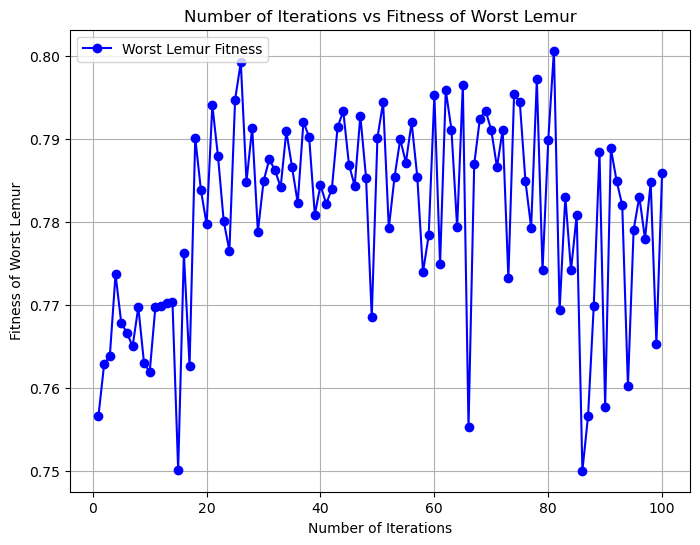

In [22]:
#Diversity measure of Hamming distance (worstbag 5)
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of lemurs and the desired bag size range
num_lemurs = 5
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Define the fitness function
def fitness_function(accuracy, diversity, precision, recall, f1):
    return (0.5 * accuracy + 
            0.2 * diversity + 
            0.1 * precision + 
            0.1 * recall + 
            0.1 * f1)

# Define the Lemur Algorithm
def lemur_algorithm(data, classifiers, num_lemurs, min_bag_size, max_bag_size, num_iterations=10):
    # Initialize the lemurs randomly
    lemurs = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size), replace=False) for _ in range(num_lemurs)]

    # Tracking lists for worst lemur metrics and fitness
    worst_lemur_accuracies = []
    worst_lemur_diversities = []
    worst_lemur_fitnesses = []

    # Perform Lemur Algorithm optimization
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each lemur using 5-fold cross-validation
        for lemur in lemurs:
            X_train_lemur, y_train_lemur = data[lemur, :-1], data[lemur, -1]

            ensemble_preds = np.empty((len(X_train_lemur), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_lemur, y_train_lemur)
                preds = model.predict(X_train_lemur)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_lemur, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each lemur
        fitness = [fitness_function(accuracy, diversity, 
                                    precision_score(y_train_lemur, ensemble_preds_majority), 
                                    recall_score(y_train_lemur, ensemble_preds_majority), 
                                    f1_score(y_train_lemur, ensemble_preds_majority)) 
                   for accuracy, diversity in zip(accuracies, diversities)]

        # Identify the lemur with the worst performance
        worst_lemur_index = np.argmin(fitness)
        worst_lemur_accuracy = accuracies[worst_lemur_index]
        worst_lemur_diversity = diversities[worst_lemur_index]

        # Append worst lemur metrics and fitness to tracking lists
        worst_lemur_accuracies.append(worst_lemur_accuracy)
        worst_lemur_diversities.append(worst_lemur_diversity)
        worst_lemur_fitnesses.append(fitness[worst_lemur_index])

        # Movement of lemurs
        for i in range(num_lemurs):
            for j in range(num_lemurs):
                if fitness[i] < fitness[j] and len(lemurs[i]) == len(lemurs[j]):
                    r = np.linalg.norm(data[lemurs[i], :-1]- data[lemurs[j], :-1], axis=1).sum()
                    step_size = np.exp(-r)  # Step size based on distance
                    new_lemur = lemurs[i] + step_size * (lemurs[j] - lemurs[i])
                    new_lemur = new_lemur.astype(int)  # Ensure indices remain integers
                    lemurs[i] = new_lemur

        # Replace the worst lemur with a new lemur randomly sampled from the dataset
        new_lemur = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size), replace=False)
        lemurs[worst_lemur_index] = new_lemur

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Lemur Accuracy: {worst_lemur_accuracy}")
            print(f"Worst Lemur Diversity (Hamming Distance): {worst_lemur_diversity}")
            print(f"Worst Lemur Fitness: {fitness[worst_lemur_index]}")
            print()

    # Return the optimized lemurs and tracking lists
    return lemurs, worst_lemur_accuracies, worst_lemur_diversities, worst_lemur_fitnesses

# Define number of iterations globally
num_iterations = 100

# Perform Lemur Algorithm optimization to get the optimal lemurs and tracking lists
optimal_lemurs, worst_lemur_accuracies, worst_lemur_diversities, worst_lemur_fitnesses = lemur_algorithm(data, classifiers, num_lemurs, min_bag_size, max_bag_size, num_iterations)

# Line plot for number of iterations vs fitness of worst lemur
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations + 1), worst_lemur_fitnesses, marker='o', color='b', label='Worst Lemur Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Lemur')
plt.title('Number of Iterations vs Fitness of Worst Lemur')
plt.legend()
plt.grid(True)
plt.show()

Iteration 20:
Worst Lemur Accuracy: 0.9191919191919192
Worst Lemur Diversity (Hamming Distance): 0.23232323232323232
Worst Lemur Fitness: 0.7887607799186747

Iteration 40:
Worst Lemur Accuracy: 0.90234375
Worst Lemur Diversity (Hamming Distance): 0.18359375
Worst Lemur Fitness: 0.7705907988580687

Iteration 60:
Worst Lemur Accuracy: 0.9030303030303031
Worst Lemur Diversity (Hamming Distance): 0.26666666666666666
Worst Lemur Fitness: 0.7715494516845086

Iteration 80:
Worst Lemur Accuracy: 0.9153225806451613
Worst Lemur Diversity (Hamming Distance): 0.1693548387096774
Worst Lemur Fitness: 0.7664519330283232

Iteration 100:
Worst Lemur Accuracy: 0.8839285714285714
Worst Lemur Diversity (Hamming Distance): 0.23660714285714285
Worst Lemur Fitness: 0.7647449069527334



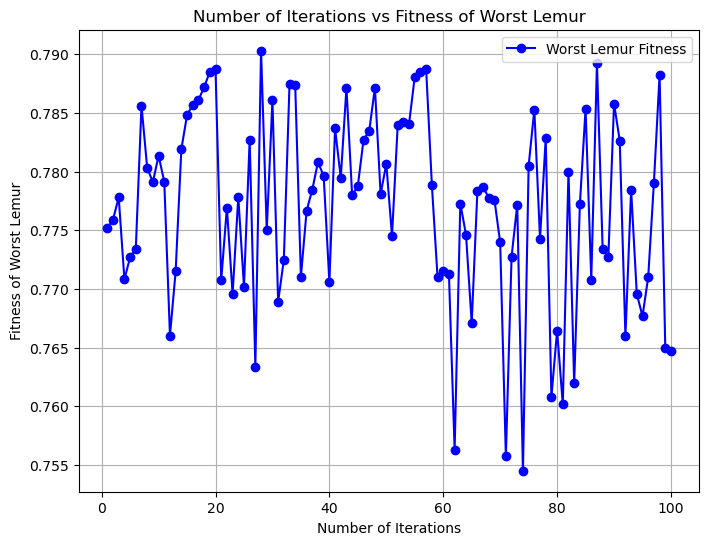

In [23]:
#Diversity measure of Hamming distance (worstbag 10)
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of lemurs and the desired bag size range
num_lemurs = 10
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Define the fitness function
def fitness_function(accuracy, diversity, precision, recall, f1):
    return (0.5 * accuracy + 
            0.2 * diversity + 
            0.1 * precision + 
            0.1 * recall + 
            0.1 * f1)

# Define the Lemur Algorithm
def lemur_algorithm(data, classifiers, num_lemurs, min_bag_size, max_bag_size, num_iterations=10):
    # Initialize the lemurs randomly
    lemurs = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size), replace=False) for _ in range(num_lemurs)]

    # Tracking lists for worst lemur metrics and fitness
    worst_lemur_accuracies = []
    worst_lemur_diversities = []
    worst_lemur_fitnesses = []

    # Perform Lemur Algorithm optimization
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each lemur using 5-fold cross-validation
        for lemur in lemurs:
            X_train_lemur, y_train_lemur = data[lemur, :-1], data[lemur, -1]

            ensemble_preds = np.empty((len(X_train_lemur), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_lemur, y_train_lemur)
                preds = model.predict(X_train_lemur)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_lemur, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each lemur
        fitness = [fitness_function(accuracy, diversity, 
                                    precision_score(y_train_lemur, ensemble_preds_majority), 
                                    recall_score(y_train_lemur, ensemble_preds_majority), 
                                    f1_score(y_train_lemur, ensemble_preds_majority)) 
                   for accuracy, diversity in zip(accuracies, diversities)]

        # Identify the lemur with the worst performance
        worst_lemur_index = np.argmin(fitness)
        worst_lemur_accuracy = accuracies[worst_lemur_index]
        worst_lemur_diversity = diversities[worst_lemur_index]

        # Append worst lemur metrics and fitness to tracking lists
        worst_lemur_accuracies.append(worst_lemur_accuracy)
        worst_lemur_diversities.append(worst_lemur_diversity)
        worst_lemur_fitnesses.append(fitness[worst_lemur_index])

        # Movement of lemurs
        for i in range(num_lemurs):
            for j in range(num_lemurs):
                if fitness[i] < fitness[j] and len(lemurs[i]) == len(lemurs[j]):
                    r = np.linalg.norm(data[lemurs[i], :-1]- data[lemurs[j], :-1], axis=1).sum()
                    step_size = np.exp(-r)  # Step size based on distance
                    new_lemur = lemurs[i] + step_size * (lemurs[j] - lemurs[i])
                    new_lemur = new_lemur.astype(int)  # Ensure indices remain integers
                    lemurs[i] = new_lemur

        # Replace the worst lemur with a new lemur randomly sampled from the dataset
        new_lemur = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size), replace=False)
        lemurs[worst_lemur_index] = new_lemur

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Lemur Accuracy: {worst_lemur_accuracy}")
            print(f"Worst Lemur Diversity (Hamming Distance): {worst_lemur_diversity}")
            print(f"Worst Lemur Fitness: {fitness[worst_lemur_index]}")
            print()

    # Return the optimized lemurs and tracking lists
    return lemurs, worst_lemur_accuracies, worst_lemur_diversities, worst_lemur_fitnesses

# Define number of iterations globally
num_iterations = 100

# Perform Lemur Algorithm optimization to get the optimal lemurs and tracking lists
optimal_lemurs, worst_lemur_accuracies, worst_lemur_diversities, worst_lemur_fitnesses = lemur_algorithm(data, classifiers, num_lemurs, min_bag_size, max_bag_size, num_iterations)

# Line plot for number of iterations vs fitness of worst lemur
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations + 1), worst_lemur_fitnesses, marker='o', color='b', label='Worst Lemur Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Lemur')
plt.title('Number of Iterations vs Fitness of Worst Lemur')
plt.legend()
plt.grid(True)
plt.show()

Iteration 20:
Worst Lemur Accuracy: 0.9097744360902256
Worst Lemur Diversity (Hamming Distance): 0.18796992481203006
Worst Lemur Fitness: 0.772519645260569

Iteration 40:
Worst Lemur Accuracy: 0.8714285714285714
Worst Lemur Diversity (Hamming Distance): 0.2642857142857143
Worst Lemur Fitness: 0.7570810856701391

Iteration 60:
Worst Lemur Accuracy: 0.9071729957805907
Worst Lemur Diversity (Hamming Distance): 0.21518987341772153
Worst Lemur Fitness: 0.7774645263372806

Iteration 80:
Worst Lemur Accuracy: 0.9158415841584159
Worst Lemur Diversity (Hamming Distance): 0.2079207920792079
Worst Lemur Fitness: 0.7760025456288322

Iteration 100:
Worst Lemur Accuracy: 0.9333333333333333
Worst Lemur Diversity (Hamming Distance): 0.2111111111111111
Worst Lemur Fitness: 0.7853864840226716



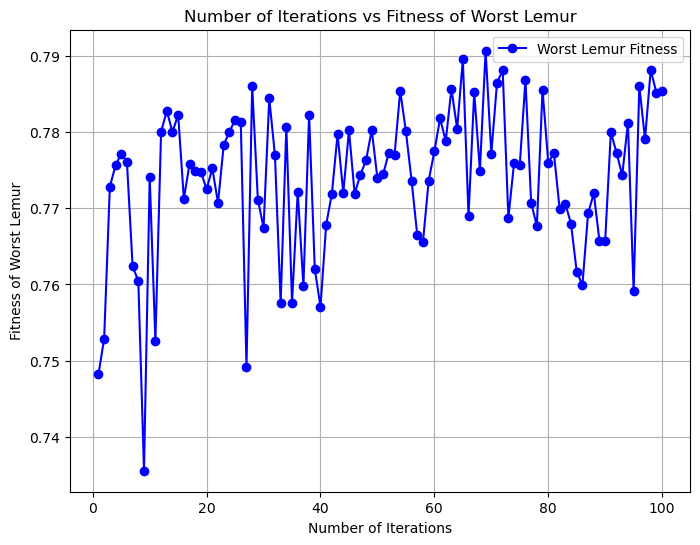

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.9629629629629629
AUC: 0.9523809523809523
Sensitivity (Recall): 0.9047619047619048
Specificity: 1.0
Precision: 1.0
F1 Score: 0.9500000000000001
G-measure: 0.9511897312113419


In [20]:
#BEST BAG HAMMING 10 BAGS 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of lemurs and the desired bag size range
num_lemurs = 10
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Define the fitness function
def fitness_function(accuracy, diversity, precision, recall, f1):
    return (0.5 * accuracy + 
            0.2 * diversity + 
            0.1 * precision + 
            0.1 * recall + 
            0.1 * f1)

# Define the Lemur Algorithm
def lemur_algorithm(data, classifiers, num_lemurs, min_bag_size, max_bag_size, num_iterations=100):
    # Initialize the lemurs randomly
    lemurs = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size), replace=False) for _ in range(num_lemurs)]

    # Tracking lists for worst lemur metrics and fitness
    worst_lemur_accuracies = []
    worst_lemur_diversities = []
    worst_lemur_fitnesses = []

    # Perform Lemur Algorithm optimization
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each lemur using 5-fold cross-validation
        for lemur in lemurs:
            X_train_lemur, y_train_lemur = data[lemur, :-1], data[lemur, -1]

            ensemble_preds = np.empty((len(X_train_lemur), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_lemur, y_train_lemur)
                preds = model.predict(X_train_lemur)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_lemur, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each lemur
        fitness = [fitness_function(accuracy, diversity, 
                                    precision_score(y_train_lemur, ensemble_preds_majority), 
                                    recall_score(y_train_lemur, ensemble_preds_majority), 
                                    f1_score(y_train_lemur, ensemble_preds_majority)) 
                   for accuracy, diversity in zip(accuracies, diversities)]

        # Identify the lemur with the worst performance
        worst_lemur_index = np.argmin(fitness)
        worst_lemur_accuracy = accuracies[worst_lemur_index]
        worst_lemur_diversity = diversities[worst_lemur_index]

        # Append worst lemur metrics and fitness to tracking lists
        worst_lemur_accuracies.append(worst_lemur_accuracy)
        worst_lemur_diversities.append(worst_lemur_diversity)
        worst_lemur_fitnesses.append(fitness[worst_lemur_index])

        # Movement of lemurs
        for i in range(num_lemurs):
            for j in range(num_lemurs):
                if fitness[i] < fitness[j] and len(lemurs[i]) == len(lemurs[j]):
                    r = np.linalg.norm(data[lemurs[i], :-1]- data[lemurs[j], :-1], axis=1).sum()
                    step_size = np.exp(-r)  # Step size based on distance
                    new_lemur = lemurs[i] + step_size * (lemurs[j] - lemurs[i])
                    new_lemur = new_lemur.astype(int)  # Ensure indices remain integers
                    lemurs[i] = new_lemur

        # Replace the worst lemur with a new lemur randomly sampled from the dataset
        new_lemur = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size), replace=False)
        lemurs[worst_lemur_index] = new_lemur

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Lemur Accuracy: {worst_lemur_accuracy}")
            print(f"Worst Lemur Diversity (Hamming Distance): {worst_lemur_diversity}")
            print(f"Worst Lemur Fitness: {fitness[worst_lemur_index]}")
            print()

    # Return the optimized lemurs and tracking lists
    return lemurs, worst_lemur_accuracies, worst_lemur_diversities, worst_lemur_fitnesses

# Define number of iterations globally
num_iterations = 100

# Perform Lemur Algorithm optimization to get the optimal lemurs and tracking lists
optimal_lemurs, worst_lemur_accuracies, worst_lemur_diversities, worst_lemur_fitnesses = lemur_algorithm(data, classifiers, num_lemurs, min_bag_size, max_bag_size, num_iterations)

# Line plot for number of iterations vs fitness of worst lemur
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations + 1), worst_lemur_fitnesses, marker='o', color='b', label='Worst Lemur Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Lemur')
plt.title('Number of Iterations vs Fitness of Worst Lemur')
plt.legend()
plt.grid(True)
plt.show()

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal lemur
    classifier = clf['model']
    optimal_lemur = optimal_lemurs[idx]
    
    # Train the classifier on the optimal lemur (training data)
    classifier.fit(X[optimal_lemur], y[optimal_lemur])
    
    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)
    
    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)
print("G-measure:", g_measure)



Iteration 20:
Worst Lemur Accuracy: 0.949685534591195
Worst Lemur Diversity (Hamming Distance): 0.13836477987421383
Worst Lemur Fitness: 0.7767600846008943

Iteration 40:
Worst Lemur Accuracy: 0.945273631840796
Worst Lemur Diversity (Hamming Distance): 0.13930348258706468
Worst Lemur Fitness: 0.7726265523476727

Iteration 60:
Worst Lemur Accuracy: 0.8883495145631068
Worst Lemur Diversity (Hamming Distance): 0.19902912621359223
Worst Lemur Fitness: 0.7456722101961567

Iteration 80:
Worst Lemur Accuracy: 0.9393939393939394
Worst Lemur Diversity (Hamming Distance): 0.2
Worst Lemur Fitness: 0.7904969713830474

Iteration 100:
Worst Lemur Accuracy: 0.9120879120879121
Worst Lemur Diversity (Hamming Distance): 0.2032967032967033
Worst Lemur Fitness: 0.7646659612211587



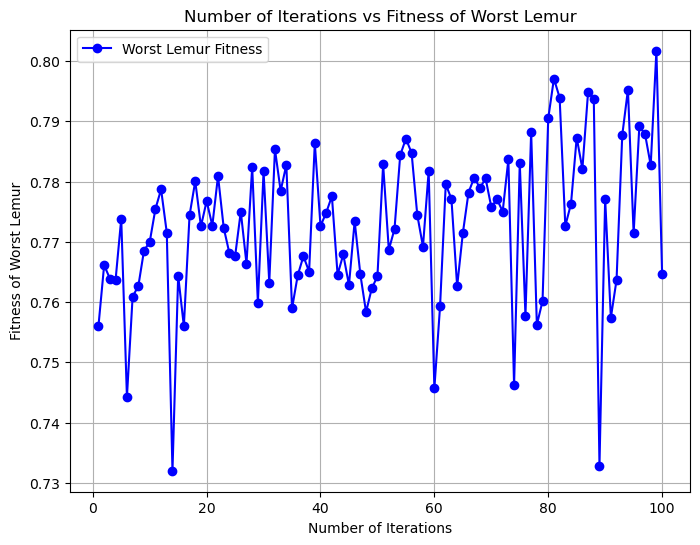

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.9259259259259259
AUC: 0.9220779220779222
Sensitivity (Recall): 0.9047619047619048
Specificity: 0.9393939393939394
Precision: 0.9047619047619048
F1 Score: 0.9047619047619048
G-measure: 0.9219153160284571
G-measure: 0.9219153160284571


In [21]:
#HAMMING BEST 5 BAGS 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of lemurs and the desired bag size range
num_lemurs = 5
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Define the fitness function
def fitness_function(accuracy, diversity, precision, recall, f1):
    return (0.5 * accuracy + 
            0.2 * diversity + 
            0.1 * precision + 
            0.1 * recall + 
            0.1 * f1)

# Define the Lemur Algorithm
def lemur_algorithm(data, classifiers, num_lemurs, min_bag_size, max_bag_size, num_iterations=100):
    # Initialize the lemurs randomly
    lemurs = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size), replace=False) for _ in range(num_lemurs)]

    # Tracking lists for worst lemur metrics and fitness
    worst_lemur_accuracies = []
    worst_lemur_diversities = []
    worst_lemur_fitnesses = []

    # Perform Lemur Algorithm optimization
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each lemur using 5-fold cross-validation
        for lemur in lemurs:
            X_train_lemur, y_train_lemur = data[lemur, :-1], data[lemur, -1]

            ensemble_preds = np.empty((len(X_train_lemur), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_lemur, y_train_lemur)
                preds = model.predict(X_train_lemur)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_lemur, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each lemur
        fitness = [fitness_function(accuracy, diversity, 
                                    precision_score(y_train_lemur, ensemble_preds_majority), 
                                    recall_score(y_train_lemur, ensemble_preds_majority), 
                                    f1_score(y_train_lemur, ensemble_preds_majority)) 
                   for accuracy, diversity in zip(accuracies, diversities)]

        # Identify the lemur with the worst performance
        worst_lemur_index = np.argmin(fitness)
        worst_lemur_accuracy = accuracies[worst_lemur_index]
        worst_lemur_diversity = diversities[worst_lemur_index]

        # Append worst lemur metrics and fitness to tracking lists
        worst_lemur_accuracies.append(worst_lemur_accuracy)
        worst_lemur_diversities.append(worst_lemur_diversity)
        worst_lemur_fitnesses.append(fitness[worst_lemur_index])

        # Movement of lemurs
        for i in range(num_lemurs):
            for j in range(num_lemurs):
                if fitness[i] < fitness[j] and len(lemurs[i]) == len(lemurs[j]):
                    r = np.linalg.norm(data[lemurs[i], :-1]- data[lemurs[j], :-1], axis=1).sum()
                    step_size = np.exp(-r)  # Step size based on distance
                    new_lemur = lemurs[i] + step_size * (lemurs[j] - lemurs[i])
                    new_lemur = new_lemur.astype(int)  # Ensure indices remain integers
                    lemurs[i] = new_lemur

        # Replace the worst lemur with a new lemur randomly sampled from the dataset
        new_lemur = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size), replace=False)
        lemurs[worst_lemur_index] = new_lemur

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Lemur Accuracy: {worst_lemur_accuracy}")
            print(f"Worst Lemur Diversity (Hamming Distance): {worst_lemur_diversity}")
            print(f"Worst Lemur Fitness: {fitness[worst_lemur_index]}")
            print()

    # Return the optimized lemurs and tracking lists
    return lemurs, worst_lemur_accuracies, worst_lemur_diversities, worst_lemur_fitnesses

# Define number of iterations globally
num_iterations = 100

# Perform Lemur Algorithm optimization to get the optimal lemurs and tracking lists
optimal_lemurs, worst_lemur_accuracies, worst_lemur_diversities, worst_lemur_fitnesses = lemur_algorithm(data, classifiers, num_lemurs, min_bag_size, max_bag_size, num_iterations)

# Line plot for number of iterations vs fitness of worst lemur
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations + 1), worst_lemur_fitnesses, marker='o', color='b', label='Worst Lemur Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Lemur')
plt.title('Number of Iterations vs Fitness of Worst Lemur')
plt.legend()
plt.grid(True)
plt.show()

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal lemur
    classifier = clf['model']
    optimal_lemur = optimal_lemurs[idx]
    
    # Train the classifier on the optimal lemur (training data)
    classifier.fit(X[optimal_lemur], y[optimal_lemur])
    
    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)
    
    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)
print("G-measure:", g_measure)



Iteration 20:
Worst Lemur Accuracy: 0.9132075471698113
Worst Lemur Diversity (Hamming Distance): 0.16226415094339622
Worst Lemur Fitness: 0.7688884413848444

Iteration 40:
Worst Lemur Accuracy: 0.926829268292683
Worst Lemur Diversity (Hamming Distance): 0.0975609756097561
Worst Lemur Fitness: 0.7643122274957963

Iteration 60:
Worst Lemur Accuracy: 0.9274193548387096
Worst Lemur Diversity (Hamming Distance): 0.22580645161290322
Worst Lemur Fitness: 0.7902563659694389

Iteration 80:
Worst Lemur Accuracy: 0.9263803680981595
Worst Lemur Diversity (Hamming Distance): 0.20245398773006135
Worst Lemur Fitness: 0.7850663798225955

Iteration 100:
Worst Lemur Accuracy: 0.9103139013452914
Worst Lemur Diversity (Hamming Distance): 0.17488789237668162
Worst Lemur Fitness: 0.7699663667592415



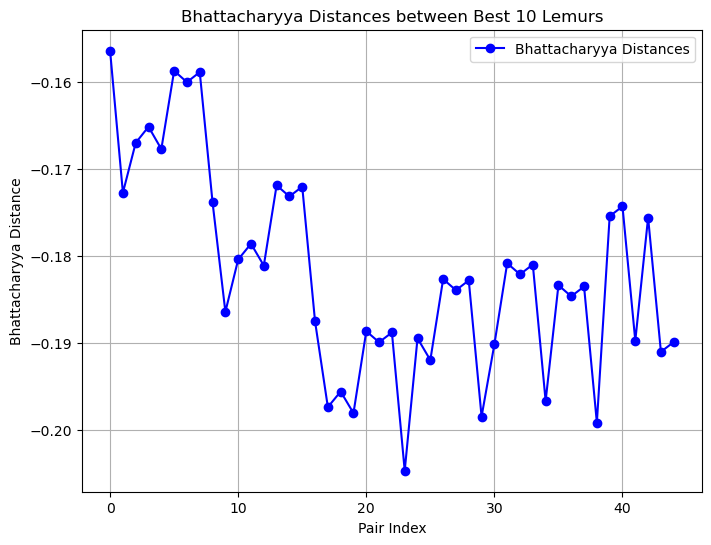

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.9259259259259259
AUC: 0.9220779220779222
Sensitivity (Recall): 0.9047619047619048
Specificity: 0.9393939393939394
Precision: 0.9047619047619048
F1 Score: 0.9047619047619048
G-measure: 0.9219153160284571


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Manually implement the Bhattacharyya distance
def bhattacharyya_distance(p, q):
    return -np.log(np.sum(np.sqrt(p * q)))

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of lemurs and the desired bag size range
num_lemurs = 10
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Define the fitness function
def fitness_function(accuracy, diversity, precision, recall, f1):
    return (0.5 * accuracy + 
            0.2 * diversity + 
            0.1 * precision + 
            0.1 * recall + 
            0.1 * f1)

# Define the Lemur Algorithm
def lemur_algorithm(data, classifiers, num_lemurs, min_bag_size, max_bag_size, num_iterations=100):
    # Initialize the lemurs randomly
    lemurs = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size), replace=False) for _ in range(num_lemurs)]

    # Tracking lists for lemur metrics and fitness
    all_lemurs_fitness = []
    lemurs_data = []

    # Perform Lemur Algorithm optimization
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each lemur using 5-fold cross-validation
        for lemur in lemurs:
            X_train_lemur, y_train_lemur = data[lemur, :-1], data[lemur, -1]

            ensemble_preds = np.empty((len(X_train_lemur), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_lemur, y_train_lemur)
                preds = model.predict(X_train_lemur)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_lemur, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each lemur
        fitness = [fitness_function(accuracy, diversity, 
                                    precision_score(y_train_lemur, ensemble_preds_majority), 
                                    recall_score(y_train_lemur, ensemble_preds_majority), 
                                    f1_score(y_train_lemur, ensemble_preds_majority)) 
                   for accuracy, diversity in zip(accuracies, diversities)]

        # Track all lemurs fitness
        all_lemurs_fitness.extend(fitness)
        lemurs_data.extend(lemurs)

        # Identify the lemur with the worst performance
        worst_lemur_index = np.argmin(fitness)
        worst_lemur_accuracy = accuracies[worst_lemur_index]
        worst_lemur_diversity = diversities[worst_lemur_index]

        # Movement of lemurs
        for i in range(num_lemurs):
            for j in range(num_lemurs):
                if fitness[i] < fitness[j] and len(lemurs[i]) == len(lemurs[j]):
                    r = np.linalg.norm(data[lemurs[i], :-1] - data[lemurs[j], :-1], axis=1).sum()
                    step_size = np.exp(-r)  # Step size based on distance
                    new_lemur = lemurs[i] + step_size * (lemurs[j] - lemurs[i])
                    new_lemur = new_lemur.astype(int)  # Ensure indices remain integers
                    lemurs[i] = new_lemur

        # Replace the worst lemur with a new lemur randomly sampled from the dataset
        new_lemur = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size), replace=False)
        lemurs[worst_lemur_index] = new_lemur

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Lemur Accuracy: {worst_lemur_accuracy}")
            print(f"Worst Lemur Diversity (Hamming Distance): {worst_lemur_diversity}")
            print(f"Worst Lemur Fitness: {fitness[worst_lemur_index]}")
            print()

    # Select the best 10 lemurs based on fitness
    best_lemur_indices = np.argsort(all_lemurs_fitness)[-10:]
    best_lemurs = [lemurs_data[idx] for idx in best_lemur_indices]

    return best_lemurs, all_lemurs_fitness

# Define number of iterations globally
num_iterations = 100

# Perform Lemur Algorithm optimization to get the optimal lemurs and tracking lists
optimal_lemurs, all_lemurs_fitness = lemur_algorithm(data, classifiers, num_lemurs, min_bag_size, max_bag_size, num_iterations)

# Calculate Bhattacharyya distance for the best 10 lemurs
def calculate_bhattacharyya_distance(lemurs, data):
    distances = []
    for i in range(len(lemurs)):
        for j in range(i + 1, len(lemurs)):
            lemur1_probs = np.mean(lemurs[i], axis=0)
            lemur2_probs = np.mean(lemurs[j], axis=0)
            distance = bhattacharyya_distance(lemur1_probs, lemur2_probs)
            distances.append(distance)
    return distances

# Train classifiers on best 10 lemurs and get predictions
best_lemur_preds = []
for lemur in optimal_lemurs:
    lemur_preds = np.empty((len(X_test), len(classifiers)))
    for idx, (name, clf) in enumerate(classifiers.items()):
        classifier = clf['model']
        classifier.fit(X[lemur], y[lemur])
        probs = classifier.predict_proba(X_test)
        lemur_preds[:, idx] = probs[:, 1]
    best_lemur_preds.append(lemur_preds)

# Calculate Bhattacharyya distance between the best 10 lemurs' predictions
bhattacharyya_distances = calculate_bhattacharyya_distance(best_lemur_preds, data)

# Plot Bhattacharyya distances
plt.figure(figsize=(8, 6))
plt.plot(bhattacharyya_distances, marker='o', color='b', label='Bhattacharyya Distances')
plt.xlabel('Pair Index')
plt.ylabel('Bhattacharyya Distance')
plt.title('Bhattacharyya Distances between Best 10 Lemurs')
plt.legend()
plt.grid(True)
plt.show()

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal lemur
    classifier = clf['model']
    optimal_lemur = optimal_lemurs[idx]
    
    # Train the classifier on the optimal lemur (training data)
    classifier.fit(X[optimal_lemur], y[optimal_lemur])
    
    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)
    
    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)


Iteration 20:
Worst Lemur Accuracy: 0.9216867469879518
Worst Lemur Diversity (Hamming Distance): 0.18072289156626506
Worst Lemur Fitness: 0.77579479575693

Iteration 40:
Worst Lemur Accuracy: 0.9343629343629344
Worst Lemur Diversity (Hamming Distance): 0.16602316602316602
Worst Lemur Fitness: 0.7749585139090369

Iteration 60:
Worst Lemur Accuracy: 0.915929203539823
Worst Lemur Diversity (Hamming Distance): 0.168141592920354
Worst Lemur Fitness: 0.763036868357342

Iteration 80:
Worst Lemur Accuracy: 0.9213973799126638
Worst Lemur Diversity (Hamming Distance): 0.24890829694323144
Worst Lemur Fitness: 0.7902981481475505

Iteration 100:
Worst Lemur Accuracy: 0.8950276243093923
Worst Lemur Diversity (Hamming Distance): 0.27624309392265195
Worst Lemur Fitness: 0.7825802297417989



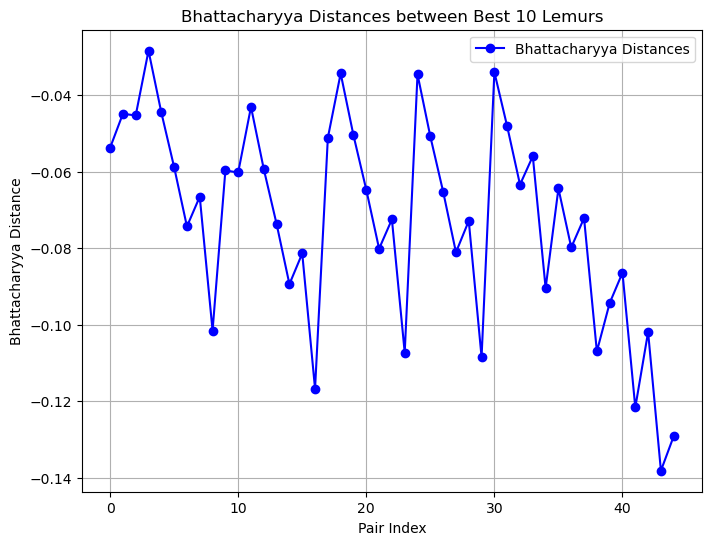

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.9814814814814815
AUC: 0.9761904761904762
Sensitivity (Recall): 0.9523809523809523
Specificity: 1.0
Precision: 1.0
F1 Score: 0.975609756097561
G-measure: 0.9759000729485332


In [18]:
#bhattacharya best 5 bags
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Manually implement the Bhattacharyya distance
def bhattacharyya_distance(p, q):
    return -np.log(np.sum(np.sqrt(p * q)))

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of lemurs and the desired bag size range
num_lemurs = 5
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Define the fitness function
def fitness_function(accuracy, diversity, precision, recall, f1):
    return (0.5 * accuracy + 
            0.2 * diversity + 
            0.1 * precision + 
            0.1 * recall + 
            0.1 * f1)

# Define the Lemur Algorithm
def lemur_algorithm(data, classifiers, num_lemurs, min_bag_size, max_bag_size, num_iterations=100):
    # Initialize the lemurs randomly
    lemurs = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size), replace=False) for _ in range(num_lemurs)]

    # Tracking lists for lemur metrics and fitness
    all_lemurs_fitness = []
    lemurs_data = []

    # Perform Lemur Algorithm optimization
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each lemur using 5-fold cross-validation
        for lemur in lemurs:
            X_train_lemur, y_train_lemur = data[lemur, :-1], data[lemur, -1]

            ensemble_preds = np.empty((len(X_train_lemur), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_lemur, y_train_lemur)
                preds = model.predict(X_train_lemur)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_lemur, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each lemur
        fitness = [fitness_function(accuracy, diversity, 
                                    precision_score(y_train_lemur, ensemble_preds_majority), 
                                    recall_score(y_train_lemur, ensemble_preds_majority), 
                                    f1_score(y_train_lemur, ensemble_preds_majority)) 
                   for accuracy, diversity in zip(accuracies, diversities)]

        # Track all lemurs fitness
        all_lemurs_fitness.extend(fitness)
        lemurs_data.extend(lemurs)

        # Identify the lemur with the worst performance
        worst_lemur_index = np.argmin(fitness)
        worst_lemur_accuracy = accuracies[worst_lemur_index]
        worst_lemur_diversity = diversities[worst_lemur_index]

        # Movement of lemurs
        for i in range(num_lemurs):
            for j in range(num_lemurs):
                if fitness[i] < fitness[j] and len(lemurs[i]) == len(lemurs[j]):
                    r = np.linalg.norm(data[lemurs[i], :-1] - data[lemurs[j], :-1], axis=1).sum()
                    step_size = np.exp(-r)  # Step size based on distance
                    new_lemur = lemurs[i] + step_size * (lemurs[j] - lemurs[i])
                    new_lemur = new_lemur.astype(int)  # Ensure indices remain integers
                    lemurs[i] = new_lemur

        # Replace the worst lemur with a new lemur randomly sampled from the dataset
        new_lemur = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size), replace=False)
        lemurs[worst_lemur_index] = new_lemur

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Lemur Accuracy: {worst_lemur_accuracy}")
            print(f"Worst Lemur Diversity (Hamming Distance): {worst_lemur_diversity}")
            print(f"Worst Lemur Fitness: {fitness[worst_lemur_index]}")
            print()

    # Select the best 10 lemurs based on fitness
    best_lemur_indices = np.argsort(all_lemurs_fitness)[-10:]
    best_lemurs = [lemurs_data[idx] for idx in best_lemur_indices]

    return best_lemurs, all_lemurs_fitness

# Define number of iterations globally
num_iterations = 100

# Perform Lemur Algorithm optimization to get the optimal lemurs and tracking lists
optimal_lemurs, all_lemurs_fitness = lemur_algorithm(data, classifiers, num_lemurs, min_bag_size, max_bag_size, num_iterations)

# Calculate Bhattacharyya distance for the best 5 lemurs
def calculate_bhattacharyya_distance(lemurs, data):
    distances = []
    for i in range(len(lemurs)):
        for j in range(i + 1, len(lemurs)):
            lemur1_probs = np.mean(lemurs[i], axis=0)
            lemur2_probs = np.mean(lemurs[j], axis=0)
            distance = bhattacharyya_distance(lemur1_probs, lemur2_probs)
            distances.append(distance)
    return distances

# Train classifiers on best 5 lemurs and get predictions
best_lemur_preds = []
for lemur in optimal_lemurs:
    lemur_preds = np.empty((len(X_test), len(classifiers)))
    for idx, (name, clf) in enumerate(classifiers.items()):
        classifier = clf['model']
        classifier.fit(X[lemur], y[lemur])
        probs = classifier.predict_proba(X_test)
        lemur_preds[:, idx] = probs[:, 1]
    best_lemur_preds.append(lemur_preds)

# Calculate Bhattacharyya distance between the best 5 lemurs' predictions
bhattacharyya_distances = calculate_bhattacharyya_distance(best_lemur_preds, data)

# Plot Bhattacharyya distances
plt.figure(figsize=(8, 6))
plt.plot(bhattacharyya_distances, marker='o', color='b', label='Bhattacharyya Distances')
plt.xlabel('Pair Index')
plt.ylabel('Bhattacharyya Distance')
plt.title('Bhattacharyya Distances between Best 5 Lemurs')
plt.legend()
plt.grid(True)
plt.show()

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal lemur
    classifier = clf['model']
    optimal_lemur = optimal_lemurs[idx]
    
    # Train the classifier on the optimal lemur (training data)
    classifier.fit(X[optimal_lemur], y[optimal_lemur])
    
    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)
    
    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)


Iteration 20:
Worst Lemur Accuracy: 0.8979591836734694
Worst Lemur Diversity (Hamming Distance): 0.2602040816326531
Worst Lemur Fitness: 0.7795231733719129

Iteration 40:
Worst Lemur Accuracy: 0.9133333333333333
Worst Lemur Diversity (Hamming Distance): 0.24666666666666667
Worst Lemur Fitness: 0.7845027652086476

Iteration 60:
Worst Lemur Accuracy: 0.953125
Worst Lemur Diversity (Hamming Distance): 0.13541666666666666
Worst Lemur Fitness: 0.7821485985419809

Iteration 80:
Worst Lemur Accuracy: 0.9420849420849421
Worst Lemur Diversity (Hamming Distance): 0.1776061776061776
Worst Lemur Fitness: 0.7850664717723541

Iteration 100:
Worst Lemur Accuracy: 0.9285714285714286
Worst Lemur Diversity (Hamming Distance): 0.19285714285714287
Worst Lemur Fitness: 0.7813599080657905



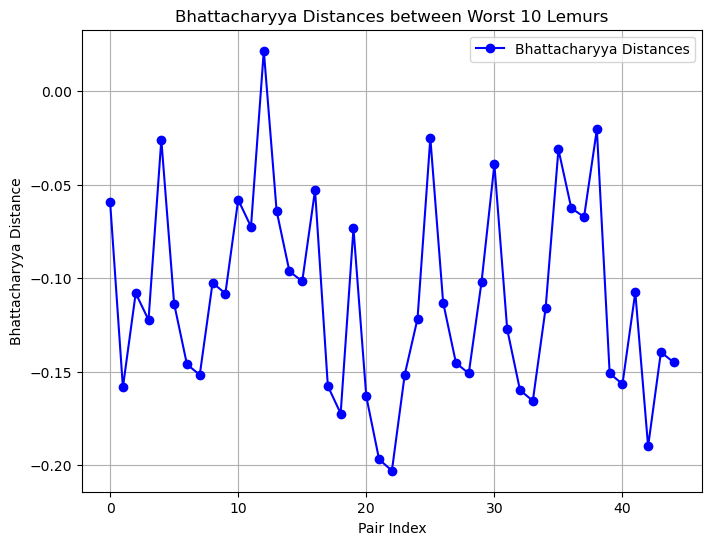

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.9074074074074074
AUC: 0.8896103896103897
Sensitivity (Recall): 0.8095238095238095
Specificity: 0.9696969696969697
Precision: 0.9444444444444444
F1 Score: 0.8717948717948718
G-measure: 0.8859981856599849


In [18]:
#bhattacharya worst 10  bags
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Manually implement the Bhattacharyya distance
def bhattacharyya_distance(p, q):
    return -np.log(np.sum(np.sqrt(p * q)))

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of lemurs and the desired bag size range
num_lemurs = 10
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Define the fitness function
def fitness_function(accuracy, diversity, precision, recall, f1):
    return (0.5 * accuracy + 
            0.2 * diversity + 
            0.1 * precision + 
            0.1 * recall + 
            0.1 * f1)

# Define the Lemur Algorithm
def lemur_algorithm(data, classifiers, num_lemurs, min_bag_size, max_bag_size, num_iterations=100):
    # Initialize the lemurs randomly
    lemurs = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size), replace=False) for _ in range(num_lemurs)]

    # Tracking lists for lemur metrics and fitness
    all_lemurs_fitness = []
    lemurs_data = []

    # Perform Lemur Algorithm optimization
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each lemur using 5-fold cross-validation
        for lemur in lemurs:
            X_train_lemur, y_train_lemur = data[lemur, :-1], data[lemur, -1]

            ensemble_preds = np.empty((len(X_train_lemur), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_lemur, y_train_lemur)
                preds = model.predict(X_train_lemur)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_lemur, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each lemur
        fitness = [fitness_function(accuracy, diversity, 
                                    precision_score(y_train_lemur, ensemble_preds_majority), 
                                    recall_score(y_train_lemur, ensemble_preds_majority), 
                                    f1_score(y_train_lemur, ensemble_preds_majority)) 
                   for accuracy, diversity in zip(accuracies, diversities)]

        # Track all lemurs fitness
        all_lemurs_fitness.extend(fitness)
        lemurs_data.extend(lemurs)

        # Identify the lemur with the worst performance
        worst_lemur_index = np.argmin(fitness)
        worst_lemur_accuracy = accuracies[worst_lemur_index]
        worst_lemur_diversity = diversities[worst_lemur_index]

        # Movement of lemurs
        for i in range(num_lemurs):
            for j in range(num_lemurs):
                if fitness[i] < fitness[j] and len(lemurs[i]) == len(lemurs[j]):
                    r = np.linalg.norm(data[lemurs[i], :-1] - data[lemurs[j], :-1], axis=1).sum()
                    step_size = np.exp(-r)  # Step size based on distance
                    new_lemur = lemurs[i] + step_size * (lemurs[j] - lemurs[i])
                    new_lemur = new_lemur.astype(int)  # Ensure indices remain integers
                    lemurs[i] = new_lemur

        # Replace the worst lemur with a new lemur randomly sampled from the dataset
        new_lemur = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size), replace=False)
        lemurs[worst_lemur_index] = new_lemur

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Lemur Accuracy: {worst_lemur_accuracy}")
            print(f"Worst Lemur Diversity (Hamming Distance): {worst_lemur_diversity}")
            print(f"Worst Lemur Fitness: {fitness[worst_lemur_index]}")
            print()

    # Select the worst 10 lemurs based on fitness
    worst_lemur_indices = np.argsort(all_lemurs_fitness)[:10]
    worst_lemurs = [lemurs_data[idx] for idx in worst_lemur_indices]

    return worst_lemurs, all_lemurs_fitness

# Define number of iterations globally
num_iterations = 100

# Perform Lemur Algorithm optimization to get the worst lemurs and tracking lists
worst_lemurs, all_lemurs_fitness = lemur_algorithm(data, classifiers, num_lemurs, min_bag_size, max_bag_size, num_iterations)

# Calculate Bhattacharyya distance for the worst 10 lemurs
def calculate_bhattacharyya_distance(lemurs, data):
    distances = []
    for i in range(len(lemurs)):
        for j in range(i + 1, len(lemurs)):
            lemur1_probs = np.mean(lemurs[i], axis=0)
            lemur2_probs = np.mean(lemurs[j], axis=0)
            distance = bhattacharyya_distance(lemur1_probs, lemur2_probs)
            distances.append(distance)
    return distances

# Train classifiers on worst 10 lemurs and get predictions
worst_lemur_preds = []
for lemur in worst_lemurs:
    lemur_preds = np.empty((len(X_test), len(classifiers)))
    for idx, (name, clf) in enumerate(classifiers.items()):
        classifier = clf['model']
        classifier.fit(X[lemur], y[lemur])
        probs = classifier.predict_proba(X_test)
        lemur_preds[:, idx] = probs[:, 1]
    worst_lemur_preds.append(lemur_preds)

# Calculate Bhattacharyya distance between the worst 10 lemurs' predictions
bhattacharyya_distances = calculate_bhattacharyya_distance(worst_lemur_preds, data)

# Plot Bhattacharyya distances
plt.figure(figsize=(8, 6))
plt.plot(bhattacharyya_distances, marker='o', color='b', label='Bhattacharyya Distances')
plt.xlabel('Pair Index')
plt.ylabel('Bhattacharyya Distance')
plt.title('Bhattacharyya Distances between Worst 10 Lemurs')
plt.legend()
plt.grid(True)
plt.show()

# Use the worst lemur ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding worst lemur
    classifier = clf['model']
    worst_lemur = worst_lemurs[idx]
    
    # Train the classifier on the worst lemur (training data)
    classifier.fit(X[worst_lemur], y[worst_lemur])
    
    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)
    
    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)


Iteration 20:
Worst Lemur Accuracy: 0.896551724137931
Worst Lemur Diversity (Entropy): 5.143199471280101
Worst Lemur Fitness: 1.7404574955069871

Iteration 40:
Worst Lemur Accuracy: 0.911504424778761
Worst Lemur Diversity (Entropy): 5.410981666785307
Worst Lemur Fitness: 1.8181573864173586

Iteration 60:
Worst Lemur Accuracy: 0.902542372881356
Worst Lemur Diversity (Entropy): 5.449029731544296
Worst Lemur Fitness: 1.8212859734204538

Iteration 80:
Worst Lemur Accuracy: 0.9052631578947369
Worst Lemur Diversity (Entropy): 5.223883725480271
Worst Lemur Fitness: 1.7776171647143395

Iteration 100:
Worst Lemur Accuracy: 0.9214876033057852
Worst Lemur Diversity (Entropy): 5.471369954872652
Worst Lemur Fitness: 1.8352266332983398



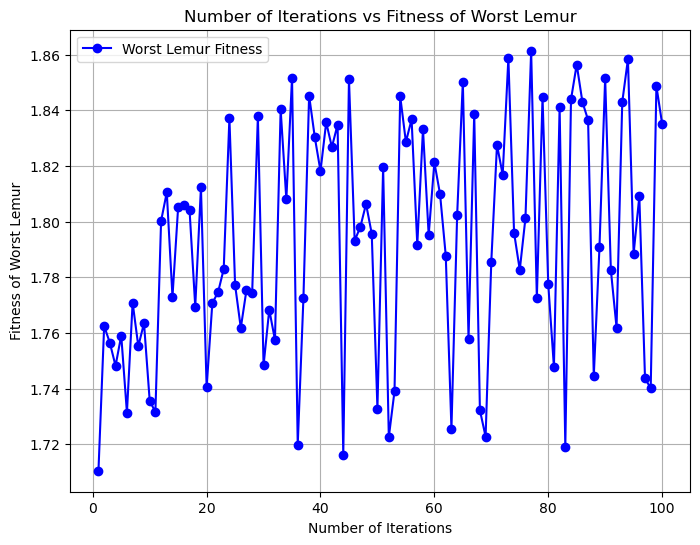

In [18]:
#entropy worst 5 lemurs
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from scipy.stats import entropy

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of lemurs and the desired lemur size range
num_lemurs = 5
min_lemur_size = len(data) // 2
max_lemur_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Define the fitness function
def fitness_function(accuracy, diversity, precision, recall, f1):
    return (0.5 * accuracy + 
            0.2 * diversity + 
            0.1 * precision + 
            0.1 * recall + 
            0.1 * f1)

# Define the Lemur Algorithm
def lemur_algorithm(data, classifiers, num_lemurs, min_lemur_size, max_lemur_size, num_iterations=100):
    # Initialize the lemurs randomly
    lemurs = [np.random.choice(len(data), np.random.randint(min_lemur_size, max_lemur_size), replace=False) for _ in range(num_lemurs)]

    # Tracking lists for worst lemur metrics and fitness
    worst_lemur_accuracies = []
    worst_lemur_diversities = []
    worst_lemur_fitnesses = []

    # Perform Lemur Algorithm optimization
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each lemur using 5-fold cross-validation
        for lemur in lemurs:
            X_train_lemur, y_train_lemur = data[lemur, :-1], data[lemur, -1]

            ensemble_preds = np.empty((len(X_train_lemur), len(classifiers)))
            entropies = np.zeros(len(classifiers))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_lemur, y_train_lemur)
                preds = model.predict(X_train_lemur)
                ensemble_preds[:, idx] = preds

                # Calculate entropy for each classifier's predictions
                class_probabilities = np.mean(ensemble_preds[:, idx] == preds.reshape(-1, 1), axis=0)
                entropies[idx] = entropy(class_probabilities)

            # Calculate diversity as average entropy of classifiers' predictions
            diversity = np.mean(entropies)

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_lemur, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each lemur
        fitness = [fitness_function(accuracy, diversity, 
                                    precision_score(y_train_lemur, ensemble_preds_majority), 
                                    recall_score(y_train_lemur, ensemble_preds_majority), 
                                    f1_score(y_train_lemur, ensemble_preds_majority)) 
                   for accuracy, diversity in zip(accuracies, diversities)]

        # Identify the lemur with the worst performance
        worst_lemur_index = np.argmin(fitness)
        worst_lemur_accuracy = accuracies[worst_lemur_index]
        worst_lemur_diversity = diversities[worst_lemur_index]

        # Append worst lemur metrics and fitness to tracking lists
        worst_lemur_accuracies.append(worst_lemur_accuracy)
        worst_lemur_diversities.append(worst_lemur_diversity)
        worst_lemur_fitnesses.append(fitness[worst_lemur_index])

        # Movement of lemurs
        for i in range(num_lemurs):
            for j in range(num_lemurs):
                if fitness[i] < fitness[j] and len(lemurs[i]) == len(lemurs[j]):
                    r = np.linalg.norm(data[lemurs[i], :-1] - data[lemurs[j], :-1], axis=1).sum()
                    step_size = np.exp(-r)  # Step size based on distance
                    new_lemur = lemurs[i] + step_size * (lemurs[j] - lemurs[i])
                    new_lemur = new_lemur.astype(int)  # Ensure indices remain integers
                    lemurs[i] = new_lemur

        # Replace the worst lemur with a new lemur randomly sampled from the dataset
        new_lemur = np.random.choice(len(data), np.random.randint(min_lemur_size, max_lemur_size), replace=False)
        lemurs[worst_lemur_index] = new_lemur

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Lemur Accuracy: {worst_lemur_accuracy}")
            print(f"Worst Lemur Diversity (Entropy): {worst_lemur_diversity}")
            print(f"Worst Lemur Fitness: {fitness[worst_lemur_index]}")
            print()

    # Return the optimized lemurs and tracking lists
    return lemurs, worst_lemur_accuracies, worst_lemur_diversities, worst_lemur_fitnesses

# Define number of iterations globally
num_iterations = 100

# Perform Lemur Algorithm optimization to get the optimal lemurs and tracking lists
optimal_lemurs, worst_lemur_accuracies, worst_lemur_diversities, worst_lemur_fitnesses = lemur_algorithm(data, classifiers, num_lemurs, min_lemur_size, max_lemur_size, num_iterations)

# Line plot for number of iterations vs fitness of worst lemur
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations + 1), worst_lemur_fitnesses, marker='o', color='b', label='Worst Lemur Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Lemur')
plt.title('Number of Iterations vs Fitness of Worst Lemur')
plt.legend()
plt.grid(True)
plt.show()


Iteration 20:
Worst Lemur Accuracy: 0.9140271493212669
Worst Lemur Diversity (Entropy): 5.381050200226198
Worst Lemur Fitness: 1.803049520837198

Iteration 40:
Worst Lemur Accuracy: 0.9385964912280702
Worst Lemur Diversity (Entropy): 5.413518421230939
Worst Lemur Fitness: 1.8203677976171764

Iteration 60:
Worst Lemur Accuracy: 0.9090909090909091
Worst Lemur Diversity (Entropy): 5.385607530109277
Worst Lemur Fitness: 1.8000328283242633

Iteration 80:
Worst Lemur Accuracy: 0.930635838150289
Worst Lemur Diversity (Entropy): 5.151688408899933
Worst Lemur Fitness: 1.7640214686120843

Iteration 100:
Worst Lemur Accuracy: 0.9158415841584159
Worst Lemur Diversity (Entropy): 5.2926299639552665
Worst Lemur Fitness: 1.7999068209569384



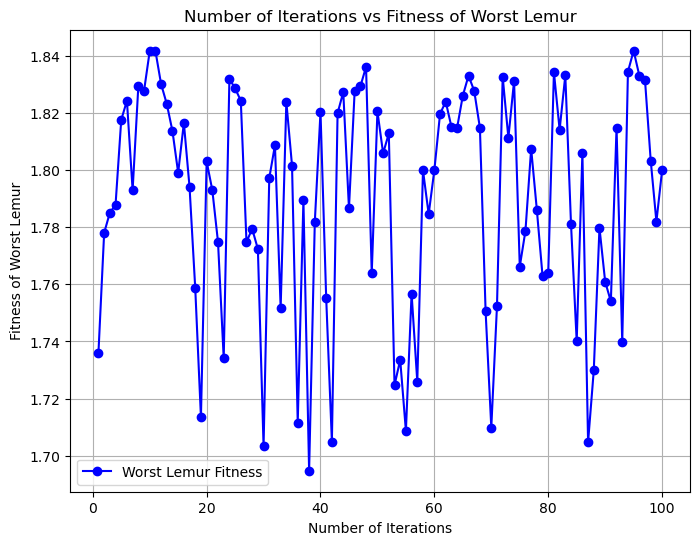

In [19]:
#entropy worst 10 Lemurs
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from scipy.stats import entropy

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of lemurs and the desired lemur size range
num_lemurs = 10
min_lemur_size = len(data) // 2
max_lemur_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Define the fitness function
def fitness_function(accuracy, diversity, precision, recall, f1):
    return (0.5 * accuracy + 
            0.2 * diversity + 
            0.1 * precision + 
            0.1 * recall + 
            0.1 * f1)

# Define the Lemur Algorithm
def lemur_algorithm(data, classifiers, num_lemurs, min_lemur_size, max_lemur_size, num_iterations=100):
    # Initialize the lemurs randomly
    lemurs = [np.random.choice(len(data), np.random.randint(min_lemur_size, max_lemur_size), replace=False) for _ in range(num_lemurs)]

    # Tracking lists for worst lemur metrics and fitness
    worst_lemur_accuracies = []
    worst_lemur_diversities = []
    worst_lemur_fitnesses = []

    # Perform Lemur Algorithm optimization
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each lemur using 5-fold cross-validation
        for lemur in lemurs:
            X_train_lemur, y_train_lemur = data[lemur, :-1], data[lemur, -1]

            ensemble_preds = np.empty((len(X_train_lemur), len(classifiers)))
            entropies = np.zeros(len(classifiers))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_lemur, y_train_lemur)
                preds = model.predict(X_train_lemur)
                ensemble_preds[:, idx] = preds

                # Calculate entropy for each classifier's predictions
                class_probabilities = np.mean(ensemble_preds[:, idx] == preds.reshape(-1, 1), axis=0)
                entropies[idx] = entropy(class_probabilities)

            # Calculate diversity as average entropy of classifiers' predictions
            diversity = np.mean(entropies)

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_lemur, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each lemur
        fitness = [fitness_function(accuracy, diversity, 
                                    precision_score(y_train_lemur, ensemble_preds_majority), 
                                    recall_score(y_train_lemur, ensemble_preds_majority), 
                                    f1_score(y_train_lemur, ensemble_preds_majority)) 
                   for accuracy, diversity in zip(accuracies, diversities)]

        # Identify the lemur with the worst performance
        worst_lemur_index = np.argmin(fitness)
        worst_lemur_accuracy = accuracies[worst_lemur_index]
        worst_lemur_diversity = diversities[worst_lemur_index]

        # Append worst lemur metrics and fitness to tracking lists
        worst_lemur_accuracies.append(worst_lemur_accuracy)
        worst_lemur_diversities.append(worst_lemur_diversity)
        worst_lemur_fitnesses.append(fitness[worst_lemur_index])

        # Movement of lemurs
        for i in range(num_lemurs):
            for j in range(num_lemurs):
                if fitness[i] < fitness[j] and len(lemurs[i]) == len(lemurs[j]):
                    r = np.linalg.norm(data[lemurs[i], :-1] - data[lemurs[j], :-1], axis=1).sum()
                    step_size = np.exp(-r)  # Step size based on distance
                    new_lemur = lemurs[i] + step_size * (lemurs[j] - lemurs[i])
                    new_lemur = new_lemur.astype(int)  # Ensure indices remain integers
                    lemurs[i] = new_lemur

        # Replace the worst lemur with a new lemur randomly sampled from the dataset
        new_lemur = np.random.choice(len(data), np.random.randint(min_lemur_size, max_lemur_size), replace=False)
        lemurs[worst_lemur_index] = new_lemur

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Lemur Accuracy: {worst_lemur_accuracy}")
            print(f"Worst Lemur Diversity (Entropy): {worst_lemur_diversity}")
            print(f"Worst Lemur Fitness: {fitness[worst_lemur_index]}")
            print()

    # Return the optimized lemurs and tracking lists
    return lemurs, worst_lemur_accuracies, worst_lemur_diversities, worst_lemur_fitnesses

# Define number of iterations globally
num_iterations = 100

# Perform Lemur Algorithm optimization to get the optimal lemurs and tracking lists
optimal_lemurs, worst_lemur_accuracies, worst_lemur_diversities, worst_lemur_fitnesses = lemur_algorithm(data, classifiers, num_lemurs, min_lemur_size, max_lemur_size, num_iterations)

# Line plot for number of iterations vs fitness of worst lemur
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations + 1), worst_lemur_fitnesses, marker='o', color='b', label='Worst Lemur Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Lemur')
plt.title('Number of Iterations vs Fitness of Worst Lemur')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
# KNN cross-validation
knn = KNeighborsClassifier()
knn_scores = cross_val_score(knn, X, y, cv=5) # cv is the number of folds for cross-validation
print("KNN Scores:", knn_scores)
print("Mean KNN Score:", knn_scores.mean())

# SVM cross-validation
svm = SVC()
svm_scores = cross_val_score(svm, X, y, cv=5)
print("SVM Scores:", svm_scores)
print("Mean SVM Score:", svm_scores.mean())

# DT cross-validation
dt = DecisionTreeClassifier()
dt_scores = cross_val_score(dt, X, y, cv=5)
print("DT Scores:", dt_scores)
print("Mean DT Score:", dt_scores.mean())

KNN Scores: [0.81481481 0.7962963  0.88888889 0.83333333 0.83333333]
Mean KNN Score: 0.8333333333333334
SVM Scores: [0.75925926 0.85185185 0.85185185 0.85185185 0.87037037]
Mean SVM Score: 0.837037037037037
DT Scores: [0.61111111 0.74074074 0.7962963  0.7037037  0.85185185]
Mean DT Score: 0.7407407407407407


Iteration 20:
Worst Lemur Accuracy: 0.9263157894736842
Worst Lemur Diversity (Hamming Distance): 0.2
Worst Lemur Fitness: 0.7958398462164475

Iteration 40:
Worst Lemur Accuracy: 0.884393063583815
Worst Lemur Diversity (Hamming Distance): 0.24277456647398843
Worst Lemur Fitness: 0.7907514450867051

Iteration 60:
Worst Lemur Accuracy: 0.9319371727748691
Worst Lemur Diversity (Hamming Distance): 0.17801047120418848
Worst Lemur Fitness: 0.8015706806282722

Iteration 80:
Worst Lemur Accuracy: 0.9308510638297872
Worst Lemur Diversity (Hamming Distance): 0.20212765957446807
Worst Lemur Fitness: 0.8058510638297872

Iteration 100:
Worst Lemur Accuracy: 0.8991596638655462
Worst Lemur Diversity (Hamming Distance): 0.16806722689075632
Worst Lemur Fitness: 0.7734083310743652



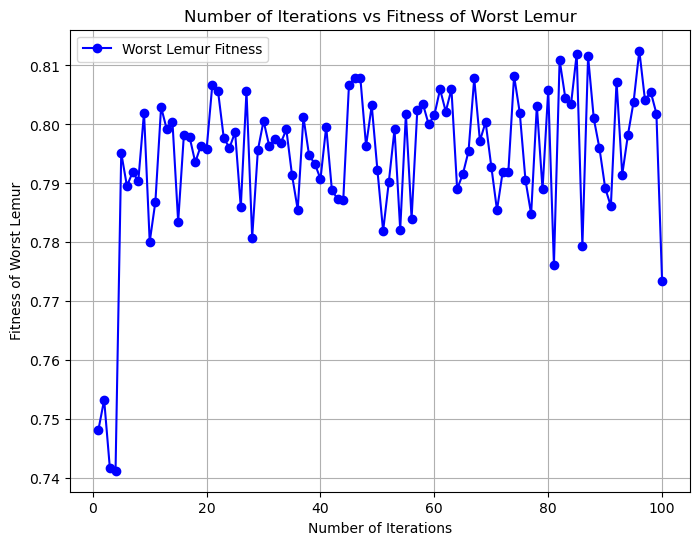

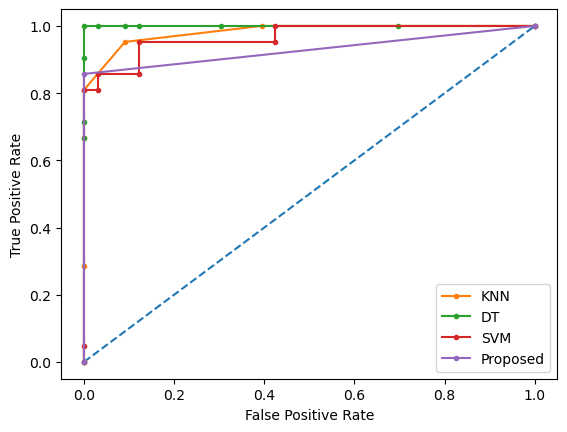

Accuracy: 0.9444444444444444
AUC: 0.9285714285714286
Precision: 1.0
Sensitivity: 0.8571428571428571
F1 Score: 0.923076923076923
Specificity: 1.0
Confusion Matrix:
 [[33  0]
 [ 3 18]]


In [21]:
#LR removed 
rn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from scipy.spatial.distance import pdist
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve
from matplotlib import pyplot as plt

# Step 1: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of lemurs and the desired bag size range
num_lemurs = 10
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Define the fitness function
def fitness_function(accuracy, diversity, precision, recall, f1):
    return (0.5 * accuracy + 
            0.2 * diversity + 
            0.1 * precision + 
            0.1 * recall + 
            0.1 * f1)

# Define the Lemur Algorithm
def lemur_algorithm(data, classifiers, num_lemurs, min_bag_size, max_bag_size, num_iterations=10):
    # Initialize the lemurs randomly
    lemurs = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size), replace=False) for _ in range(num_lemurs)]

    # Tracking lists for worst lemur metrics and fitness
    worst_lemur_accuracies = []
    worst_lemur_diversities = []
    worst_lemur_fitnesses = []

    # Perform Lemur Algorithm optimization
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each lemur using 5-fold cross-validation
        for lemur in lemurs:
            X_train_lemur, y_train_lemur = data[lemur, :-1], data[lemur, -1]

            ensemble_preds = np.empty((len(X_train_lemur), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_lemur, y_train_lemur)
                preds = model.predict(X_train_lemur)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_lemur, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each lemur
        fitness = [fitness_function(accuracy, diversity, 
                                    precision_score(y_train_lemur, ensemble_preds_majority), 
                                    recall_score(y_train_lemur, ensemble_preds_majority), 
                                    f1_score(y_train_lemur, ensemble_preds_majority)) 
                   for accuracy, diversity in zip(accuracies, diversities)]

        # Identify the lemur with the worst performance
        worst_lemur_index = np.argmin(fitness)
        worst_lemur_accuracy = accuracies[worst_lemur_index]
        worst_lemur_diversity = diversities[worst_lemur_index]

        # Append worst lemur metrics and fitness to tracking lists
        worst_lemur_accuracies.append(worst_lemur_accuracy)
        worst_lemur_diversities.append(worst_lemur_diversity)
        worst_lemur_fitnesses.append(fitness[worst_lemur_index])

        # Movement of lemurs
        for i in range(num_lemurs):
            for j in range(num_lemurs):
                if fitness[i] < fitness[j] and len(lemurs[i]) == len(lemurs[j]):
                    r = np.linalg.norm(data[lemurs[i], :-1]- data[lemurs[j], :-1], axis=1).sum()
                    step_size = np.exp(-r)  # Step size based on distance
                    new_lemur = lemurs[i] + step_size * (lemurs[j] - lemurs[i])
                    new_lemur = new_lemur.astype(int)  # Ensure indices remain integers
                    lemurs[i] = new_lemur

        # Replace the worst lemur with a new lemur randomly sampled from the dataset
        new_lemur = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size), replace=False)
        lemurs[worst_lemur_index] = new_lemur

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Lemur Accuracy: {worst_lemur_accuracy}")
            print(f"Worst Lemur Diversity (Hamming Distance): {worst_lemur_diversity}")
            print(f"Worst Lemur Fitness: {fitness[worst_lemur_index]}")
            print()

    # Return the optimized lemurs and tracking lists
    return lemurs, worst_lemur_accuracies, worst_lemur_diversities, worst_lemur_fitnesses

# Define number of iterations globally
num_iterations = 100

# Perform Lemur Algorithm optimization to get the optimal lemurs and tracking lists
optimal_lemurs, worst_lemur_accuracies, worst_lemur_diversities, worst_lemur_fitnesses = lemur_algorithm(data, classifiers, num_lemurs, min_bag_size, max_bag_size, num_iterations)

# Line plot for number of iterations vs fitness of worst lemur
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations + 1), worst_lemur_fitnesses, marker='o', color='b', label='Worst Lemur Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Lemur')
plt.title('Number of Iterations vs Fitness of Worst Lemur')
plt.legend()
plt.grid(True)
plt.show()

# Majority voting for ensemble predictions
ensemble_preds = np.empty((len(X_test), len(classifiers)))
fpr_list = []
tpr_list = []

for idx, (name, clf) in enumerate(classifiers.items()):
    model = GridSearchCV(clf['model'], clf['param_grid'], cv=5)
    model.fit(X, y)
    preds = model.predict(X_test)
    preds1 = model.predict_proba(X_test)
    pos_probs =  preds1[:, 1]
    ensemble_preds[:, idx] = preds

    # Calculate FPR and TPR for ROC curve
    fpr, tpr, _ = roc_curve(y_test, pos_probs)
    fpr_list.append(fpr)
    tpr_list.append(tpr)

ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(x.astype(int))), axis=1, arr=ensemble_preds)

# Plotting ROC curves
plt.plot([0, 1], [0, 1], linestyle='--')  # No Skill ROC curve

# Plot ROC curves for base models
for fpr, tpr, (name, _) in zip(fpr_list, tpr_list, classifiers.items()):
    plt.plot(fpr, tpr, marker='.', label=name)

# Plot ROC curve for the proposed model
fpr_proposed, tpr_proposed, _ = roc_curve(y_test, ensemble_preds_majority)
plt.plot(fpr_proposed, tpr_proposed, marker='.', label='Proposed')

# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show the legend
plt.legend()

# Show the plot
plt.show()

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
precision = precision_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
f1 = f1_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)
confusion_mat = confusion_matrix(y_test, ensemble_preds_majority)

print("Accuracy:", accuracy)
print("AUC:", auc)
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("F1 Score:", f1)
print("Specificity:", specificity)
print("Confusion Matrix:\n", confusion_mat)


Iteration 20:
Worst Lemur Accuracy: 0.9726027397260274
Worst Lemur Diversity (Hamming Distance): 0.11643835616438356
Worst Lemur Fitness: 0.7855282176319771

Iteration 40:
Worst Lemur Accuracy: 0.9577464788732394
Worst Lemur Diversity (Hamming Distance): 0.15492957746478872
Worst Lemur Fitness: 0.7841471353677075

Iteration 60:
Worst Lemur Accuracy: 0.9083969465648855
Worst Lemur Diversity (Hamming Distance): 0.1946564885496183
Worst Lemur Fitness: 0.7801527383601798

Iteration 80:
Worst Lemur Accuracy: 0.9346153846153846
Worst Lemur Diversity (Hamming Distance): 0.1423076923076923
Worst Lemur Fitness: 0.7730815001452552

Iteration 100:
Worst Lemur Accuracy: 0.9315068493150684
Worst Lemur Diversity (Hamming Distance): 0.19863013698630136
Worst Lemur Fitness: 0.7782867817114393



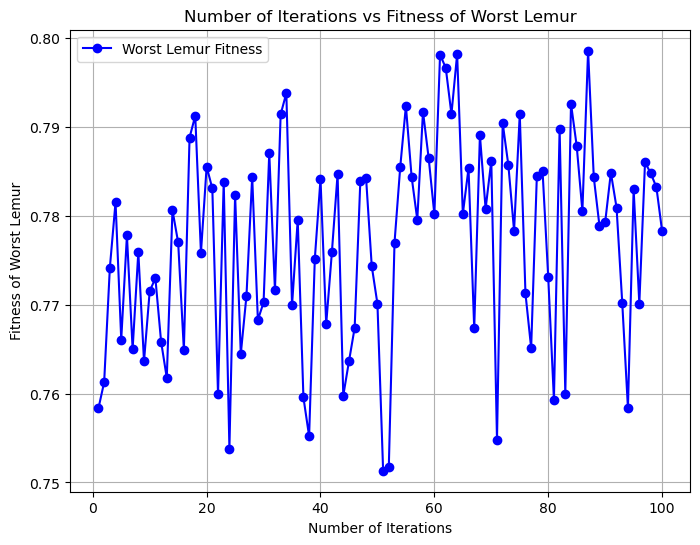

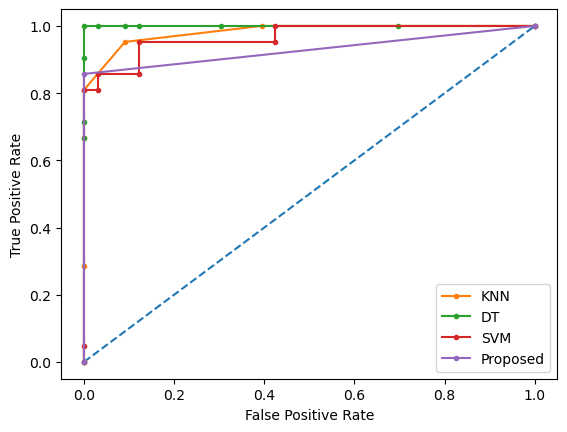

Accuracy: 0.9444444444444444
AUC: 0.9285714285714286
Precision: 1.0
Sensitivity: 0.8571428571428571
F1 Score: 0.923076923076923
Specificity: 1.0
Confusion Matrix:
 [[33  0]
 [ 3 18]]


In [20]:
#decrease the number of bags to 5
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from scipy.spatial.distance import pdist
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve
from matplotlib import pyplot as plt

# Step 1: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of lemurs and the desired bag size range
num_lemurs = 5
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Define the fitness function
def fitness_function(accuracy, diversity, precision, recall, f1):
    return (0.5 * accuracy + 
            0.2 * diversity + 
            0.1 * precision + 
            0.1 * recall + 
            0.1 * f1)

# Define the Lemur Algorithm
def lemur_algorithm(data, classifiers, num_lemurs, min_bag_size, max_bag_size, num_iterations=10):
    # Initialize the lemurs randomly
    lemurs = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size), replace=False) for _ in range(num_lemurs)]

    # Tracking lists for worst lemur metrics and fitness
    worst_lemur_accuracies = []
    worst_lemur_diversities = []
    worst_lemur_fitnesses = []

    # Perform Lemur Algorithm optimization
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each lemur using 5-fold cross-validation
        for lemur in lemurs:
            X_train_lemur, y_train_lemur = data[lemur, :-1], data[lemur, -1]

            ensemble_preds = np.empty((len(X_train_lemur), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_lemur, y_train_lemur)
                preds = model.predict(X_train_lemur)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_lemur, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each lemur
        fitness = [fitness_function(accuracy, diversity, 
                                    precision_score(y_train_lemur, ensemble_preds_majority), 
                                    recall_score(y_train_lemur, ensemble_preds_majority), 
                                    f1_score(y_train_lemur, ensemble_preds_majority)) 
                   for accuracy, diversity in zip(accuracies, diversities)]

        # Identify the lemur with the worst performance
        worst_lemur_index = np.argmin(fitness)
        worst_lemur_accuracy = accuracies[worst_lemur_index]
        worst_lemur_diversity = diversities[worst_lemur_index]

        # Append worst lemur metrics and fitness to tracking lists
        worst_lemur_accuracies.append(worst_lemur_accuracy)
        worst_lemur_diversities.append(worst_lemur_diversity)
        worst_lemur_fitnesses.append(fitness[worst_lemur_index])

        # Movement of lemurs
        for i in range(num_lemurs):
            for j in range(num_lemurs):
                if fitness[i] < fitness[j] and len(lemurs[i]) == len(lemurs[j]):
                    r = np.linalg.norm(data[lemurs[i], :-1]- data[lemurs[j], :-1], axis=1).sum()
                    step_size = np.exp(-r)  # Step size based on distance
                    new_lemur = lemurs[i] + step_size * (lemurs[j] - lemurs[i])
                    new_lemur = new_lemur.astype(int)  # Ensure indices remain integers
                    lemurs[i] = new_lemur

        # Replace the worst lemur with a new lemur randomly sampled from the dataset
        new_lemur = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size), replace=False)
        lemurs[worst_lemur_index] = new_lemur

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Lemur Accuracy: {worst_lemur_accuracy}")
            print(f"Worst Lemur Diversity (Hamming Distance): {worst_lemur_diversity}")
            print(f"Worst Lemur Fitness: {fitness[worst_lemur_index]}")
            print()

    # Return the optimized lemurs and tracking lists
    return lemurs, worst_lemur_accuracies, worst_lemur_diversities, worst_lemur_fitnesses

# Define number of iterations globally
num_iterations = 100

# Perform Lemur Algorithm optimization to get the optimal lemurs and tracking lists
optimal_lemurs, worst_lemur_accuracies, worst_lemur_diversities, worst_lemur_fitnesses = lemur_algorithm(data, classifiers, num_lemurs, min_bag_size, max_bag_size, num_iterations)

# Line plot for number of iterations vs fitness of worst lemur
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations + 1), worst_lemur_fitnesses, marker='o', color='b', label='Worst Lemur Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Lemur')
plt.title('Number of Iterations vs Fitness of Worst Lemur')
plt.legend()
plt.grid(True)
plt.show()

# Majority voting for ensemble predictions
ensemble_preds = np.empty((len(X_test), len(classifiers)))
fpr_list = []
tpr_list = []

for idx, (name, clf) in enumerate(classifiers.items()):
    model = GridSearchCV(clf['model'], clf['param_grid'], cv=5)
    model.fit(X, y)
    preds = model.predict(X_test)
    preds1 = model.predict_proba(X_test)
    pos_probs =  preds1[:, 1]
    ensemble_preds[:, idx] = preds

    # Calculate FPR and TPR for ROC curve
    fpr, tpr, _ = roc_curve(y_test, pos_probs)
    fpr_list.append(fpr)
    tpr_list.append(tpr)

ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(x.astype(int))), axis=1, arr=ensemble_preds)

# Plotting ROC curves
plt.plot([0, 1], [0, 1], linestyle='--')  # No Skill ROC curve

# Plot ROC curves for base models
for fpr, tpr, (name, _) in zip(fpr_list, tpr_list, classifiers.items()):
    plt.plot(fpr, tpr, marker='.', label=name)

# Plot ROC curve for the proposed model
fpr_proposed, tpr_proposed, _ = roc_curve(y_test, ensemble_preds_majority)
plt.plot(fpr_proposed, tpr_proposed, marker='.', label='Proposed')

# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show the legend
plt.legend()

# Show the plot
plt.show()

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
precision = precision_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
f1 = f1_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)
confusion_mat = confusion_matrix(y_test, ensemble_preds_majority)

print("Accuracy:", accuracy)
print("AUC:", auc)
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("F1 Score:", f1)
print("Specificity:", specificity)
print("Confusion Matrix:\n", confusion_mat)


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# Example placeholder for X and y
# Replace with actual data
X, y = np.random.rand(100, 10), np.random.randint(0, 2, 100)

# Combine X and y into a single dataset
data = np.c_[X, y]

# Define the number of lemurs and the desired bag size range
num_lemurs = 5
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Define the fitness function
def fitness_function(accuracy, diversity, precision, recall, f1):
    return (0.5 * accuracy + 
            0.2 * diversity + 
            0.1 * precision + 
            0.1 * recall + 
            0.1 * f1)

# Define the Lemur Algorithm
def lemur_algorithm(data, classifiers, num_lemurs, min_bag_size, max_bag_size, num_iterations=10):
    # Initialize the lemurs randomly
    lemurs = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size), replace=False) for _ in range(num_lemurs)]

    # Tracking lists for worst lemur metrics and fitness
    worst_lemur_accuracies = []
    worst_lemur_diversities = []
    worst_lemur_fitnesses = []

    # Perform Lemur Algorithm optimization
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each lemur using 5-fold cross-validation
        for lemur in lemurs:
            X_train_lemur, y_train_lemur = data[lemur, :-1], data[lemur, -1]

            ensemble_preds = np.empty((len(X_train_lemur), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_lemur, y_train_lemur)
                preds = model.predict(X_train_lemur)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_lemur, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each lemur
        fitness = [fitness_function(accuracy, diversity, 
                                    precision_score(y_train_lemur, ensemble_preds_majority), 
                                    recall_score(y_train_lemur, ensemble_preds_majority), 
                                    f1_score(y_train_lemur, ensemble_preds_majority)) 
                   for accuracy, diversity in zip(accuracies, diversities)]

        # Identify the lemur with the worst performance
        if fitness:
            worst_lemur_index = np.argmin(fitness)
            worst_lemur_accuracy = accuracies[worst_lemur_index]
            worst_lemur_diversity = diversities[worst_lemur_index]

            # Append worst lemur metrics and fitness to tracking lists
            worst_lemur_accuracies.append(worst_lemur_accuracy)
            worst_lemur_diversities.append(worst_lemur_diversity)
            worst_lemur_fitnesses.append(fitness[worst_lemur_index])

            # Movement of lemurs
            for i in range(num_lemurs):
                for j in range(num_lemurs):
                    if fitness[i] < fitness[j] and len(lemurs[i]) == len(lemurs[j]):
                        r = np.linalg.norm(data[lemurs[i], :-1] - data[lemurs[j], :-1], axis=1).sum()
                        step_size = np.exp(-r)  # Step size based on distance
                        new_lemur = lemurs[i] + step_size * (lemurs[j] - lemurs[i])
                        new_lemur = new_lemur.astype(int)  # Ensure indices remain integers
                        new_lemur = np.clip(new_lemur, 0, len(data) - 1)  # Ensure indices are valid
                        lemurs[i] = new_lemur

            # Replace the worst lemur with a new lemur randomly sampled from the dataset
            new_lemur = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size), replace=False)
            lemurs[worst_lemur_index] = new_lemur

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            if worst_lemur_fitnesses:
                print(f"Worst Lemur Accuracy: {worst_lemur_accuracy}")
                print(f"Worst Lemur Diversity (Hamming Distance): {worst_lemur_diversity}")
                print(f"Worst Lemur Fitness: {fitness[worst_lemur_index]}")
            print()

    # Return the optimized lemurs and tracking lists
    return lemurs, worst_lemur_accuracies, worst_lemur_diversities, worst_lemur_fitnesses

# Define number of iterations globally
num_iterations = 100

# Perform Lemur Algorithm optimization to get the optimal lemurs and tracking lists
optimal_lemurs, worst_lemur_accuracies, worst_lemur_diversities, worst_lemur_fitnesses = lemur_algorithm(data, classifiers, num_lemurs, min_bag_size, max_bag_size, num_iterations)

# Check if the worst_lemur_fitnesses is empty before accessing
if worst_lemur_fitnesses:
    # Use the best lemur for predictions
    best_lemur = optimal_lemurs[np.argmax(worst_lemur_fitnesses)]
    X_train_best_lemur, y_train_best_lemur = data[best_lemur, :-1], data[best_lemur, -1]

    # Example placeholder for X_test and y_test
    # Replace with actual test data
    X_test, y_test = np.random.rand(50, 10), np.random.randint(0, 2, 50)

    # Train classifiers on the best lemur's data and make predictions on the test set
    ensemble_preds = np.empty((len(X_test), len(classifiers)))
    fpr_list = []
    tpr_list = []

    for idx, (name, clf) in enumerate(classifiers.items()):
        model = GridSearchCV(clf['model'], clf['param_grid'], cv=5)
        model.fit(X_train_best_lemur, y_train_best_lemur)
        preds = model.predict(X_test)
        preds_proba = model.predict_proba(X_test)[:, 1]
        ensemble_preds[:, idx] = preds

        # Calculate FPR and TPR for ROC curve
        fpr, tpr, _ = roc_curve(y_test, preds_proba)
        fpr_list.append(fpr)
        tpr_list.append(tpr)

    # Majority voting for ensemble predictions
    ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(x.astype(int))), axis=1, arr=ensemble_preds)

    plt.plot([0, 1], [0, 1], linestyle='--')  # No Skill ROC curve

# Plot ROC curves for base models
for fpr, tpr, (name, _) in zip(fpr_list, tpr_list, classifiers.items()):
    plt.plot(fpr, tpr, marker='.', label=name)

# Plot ROC curve for the proposed ensemble model
fpr_proposed, tpr_proposed, _ = roc_curve(y_test, ensemble_preds_majority)
plt.plot(fpr_proposed, tpr_proposed, marker='.', label='Proposed')

# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show the legend
plt.legend()

# Show the plot
plt.show()

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
precision = precision_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Confusion matrix
cm = confusion_matrix(y_test, ensemble_preds_majority)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Compute specificity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

# Compute G-measure
g_measure = 2 * (sensitivity * specificity) / (sensitivity + specificity)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("F1-measure:", f1_measure)
print("Specificity:", specificity)
print("G measure:", g_measure)

Iteration 20:
Worst Lemur Accuracy: 0.8431372549019608
Worst Lemur Diversity (Hamming Distance): 0.45098039215686275
Worst Lemur Fitness: 0.7892358226987841

Iteration 40:
Worst Lemur Accuracy: 0.7901234567901234
Worst Lemur Diversity (Hamming Distance): 0.5061728395061729
Worst Lemur Fitness: 0.7537960571762582

Iteration 60:
Worst Lemur Accuracy: 0.7796610169491526
Worst Lemur Diversity (Hamming Distance): 0.6949152542372882
Worst Lemur Fitness: 0.8288135593220338

Iteration 80:
Worst Lemur Accuracy: 0.8292682926829268
Worst Lemur Diversity (Hamming Distance): 0.6097560975609756
Worst Lemur Fitness: 0.800907061181086

Iteration 100:
Worst Lemur Accuracy: 0.8787878787878788
Worst Lemur Diversity (Hamming Distance): 0.5757575757575758
Worst Lemur Fitness: 0.8080032268832757



IndexError: list index out of range